#                       CEBT IB Computing Skills Task 1
##                          Data analysis and visualisation (Python)


## Part A: Data Wrangling
The goal is to get the raw data into a structured format so we can analyze it. We'll use Python's pandas library for efficient data manipulation.

#### Step 1: Loading the Data
1. Load the data with the correct delimiter (;) and handle commas as decimal points.
2. Remove any trailing columns that appear due to extra semicolons.
3. Fix the column names to remove any leading/trailing spaces.
4. Convert the timestamp column to a proper datetime format.
5. Convert numerical columns to the appropriate numeric type.
6. Drop rows with invalid timestamps or missing values.

In [28]:
import pandas as pd
import numpy as np
# Load the dataset with proper delimiter and handling the header row
file_path = 'SCADA DATA.TXT'

# Read the file, treating the first line as header and skipping empty columns

df = pd.read_csv(
    file_path,
    delimiter=';', 
    decimal=',',
    header=0,  # Specify that the first row is the header
    usecols=lambda x: x.strip() != ''  # Ignore any empty columns
)

df.head()


,PCTimeStamp,WTG01_Ambient WindSpeed Avg. (1),WTG01_Blades PitchAngle Avg. (2),WTG01_Grid Production Power Avg. (3),Unnamed: 4
0,01/12/2019,6,"-2,8","591,5",NaN
1,01/12/2019 00.10.00,"6,1","-2,8","614,9",NaN
2,01/12/2019 00.20.00,"6,1","-2,8","612,1",NaN
3,01/12/2019 00.30.00,6,"-2,8","609,5",NaN
4,01/12/2019 00.40.00,"6,3","-2,8","583,6",NaN


#### Display the columns 

In [29]:
# Display the columns to confirm they are read correctly
print("Column names after reading the file:", df.columns)

Column names after reading the file: Index(['PCTimeStamp       ', 'WTG01_Ambient WindSpeed Avg. (1)',
       'WTG01_Blades PitchAngle Avg. (2)',
       'WTG01_Grid Production Power Avg. (3)', 'Unnamed: 4'],
      dtype='object')


#### Rename columns to more convenient names

In [30]:
# Rename columns to more convenient names
df.rename(columns={
    'PCTimeStamp': 'Timestamp',
    'WTG01_Ambient WindSpeed Avg. (1)': 'WindSpeed',
    'WTG01_Blades PitchAngle Avg. (2)': 'PitchAngle',
    'WTG01_Grid Production Power Avg. (3)': 'PowerProduced'
}, inplace=True)

# Display the updated column names
print("Updated Columns:", df.columns)


Updated Columns: Index(['PCTimeStamp       ', 'WindSpeed', 'PitchAngle', 'PowerProduced',
       'Unnamed: 4'],
      dtype='object')


In [31]:
# Strip extra whitespace from column names
df.columns = df.columns.str.strip()
# Convert columns to numeric (force errors to NaN if they can't be converted)
df['WindSpeed'] = pd.to_numeric(df['WindSpeed'], errors='coerce')
df['PowerProduced'] = pd.to_numeric(df['PowerProduced'], errors='coerce')

# Convert the PCTimeStamp column to datetime format
df['PCTimeStamp'] = pd.to_datetime(df['PCTimeStamp'], errors='coerce')
# Replace Inf values with NaN and fill NaN values with the column mean
df['WindSpeed'] = df['WindSpeed'].replace([np.inf, -np.inf], np.nan)
df['PowerProduced'] = df['PowerProduced'].replace([np.inf, -np.inf], np.nan)

df['WindSpeed'] = df['WindSpeed'].fillna(df['WindSpeed'].mean())
df['PowerProduced'] = df['PowerProduced'].fillna(df['PowerProduced'].mean())

# Drop rows with invalid timestamps or missing values
df.dropna(subset=['PCTimeStamp'], inplace=True)

# Convert other columns to numeric types
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Display the cleaned data
print("\nCleaned Data:\n", df.head())
print("\nData types:\n", df.dtypes)


Cleaned Data:
     PCTimeStamp  WindSpeed PitchAngle  PowerProduced  Unnamed: 4
0    2019-01-12   6.000000        NaN     669.019154         NaN
144  2019-02-12   6.220293        NaN     669.019154         NaN
288  2019-03-12   6.220293        NaN     148.000000         NaN
432  2019-04-12   6.220293        1.0     669.019154         NaN
576  2019-05-12   6.220293        NaN     669.019154         NaN

Data types:
 PCTimeStamp      datetime64[ns]
WindSpeed               float64
PitchAngle               object
PowerProduced           float64
Unnamed: 4              float64
dtype: object


## Part	B	– Data Visualisation


#### Step 1: Import Necessary Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Step 2: Load and Clean the Data (Already Done This)
PCTimeStamp (converted to datetime)
WindSpeed (converted to float)
PitchAngle (converted to float)
PowerProduced (converted to float)

#### Step 3: Plotting Histograms


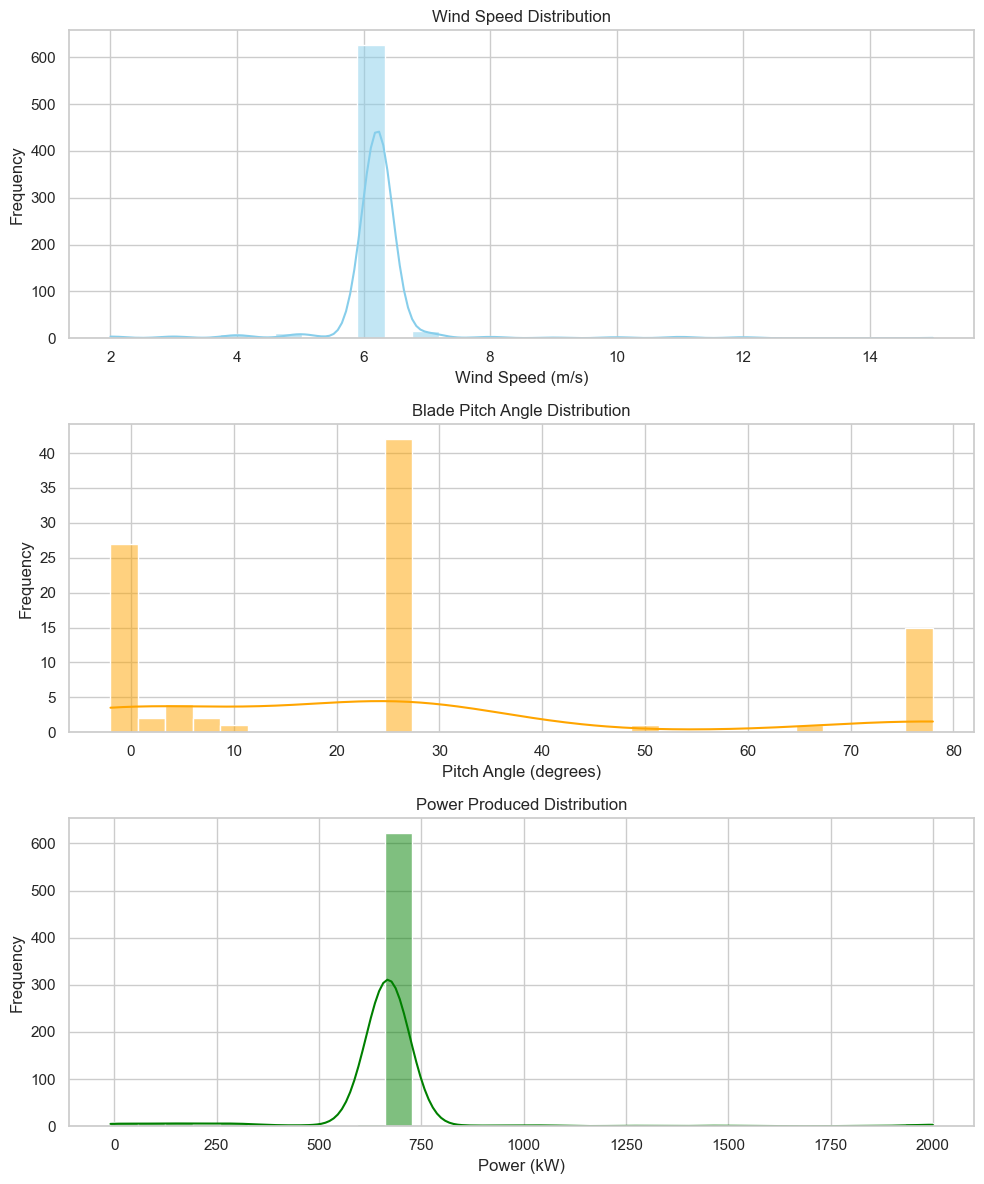

In [33]:
# Set plot style

sns.set(style='whitegrid')

# Plot histograms for wind speed, blade pitch angle, and power produced
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Wind Speed Histogram
sns.histplot(df['WindSpeed'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Wind Speed Distribution')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Frequency')

# Blade Pitch Angle Histogram
sns.histplot(df['PitchAngle'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Blade Pitch Angle Distribution')
axes[1].set_xlabel('Pitch Angle (degrees)')
axes[1].set_ylabel('Frequency')

# Power Produced Histogram
sns.histplot(df['PowerProduced'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Power Produced Distribution')
axes[2].set_xlabel('Power (kW)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


From the visualizations, here are some peculiarities observed in the distributions:

1. **Wind Speed Distribution:**
   - The distribution shows a sharp peak at around 6 m/s, suggesting that wind speeds are predominantly centered around this value. This could indicate that wind speeds in your dataset are mostly clustered around a certain range, with very few extreme values. 
   - The distribution appears heavily skewed with most values concentrated in a narrow range.

2. **Blade Pitch Angle Distribution:**
   - The distribution is highly concentrated around 0° and 30°, with very few occurrences for other pitch angles. This suggests that the blade pitch angles used in the dataset are limited, which could mean the wind turbine typically operates with only a few settings for pitch angles. 
   - The sparsity of data for angles beyond 30° suggests that these configurations are rare in this specific data sample.

3. **Power Produced Distribution:**
   - The power distribution shows a strong peak at around 750 kW, with most of the data concentrated in this region. This indicates that the wind turbine tends to produce a consistent amount of power, with very few extreme power outputs observed.
   - There is a long tail towards higher power outputs, suggesting that although the majority of the time the power is around 750 kW, occasionally it can spike to higher values, but these are rare.

These peculiarities suggest that the turbine is operating within a narrow range of wind speeds and pitch angles, leading to relatively stable power production with occasional higher outputs.

#### Scatter Plot Between Wind Speed and Power Produced

We'll start by creating a scatter plot for WindSpeed vs PowerProduced to investigate the basic relationship between them.

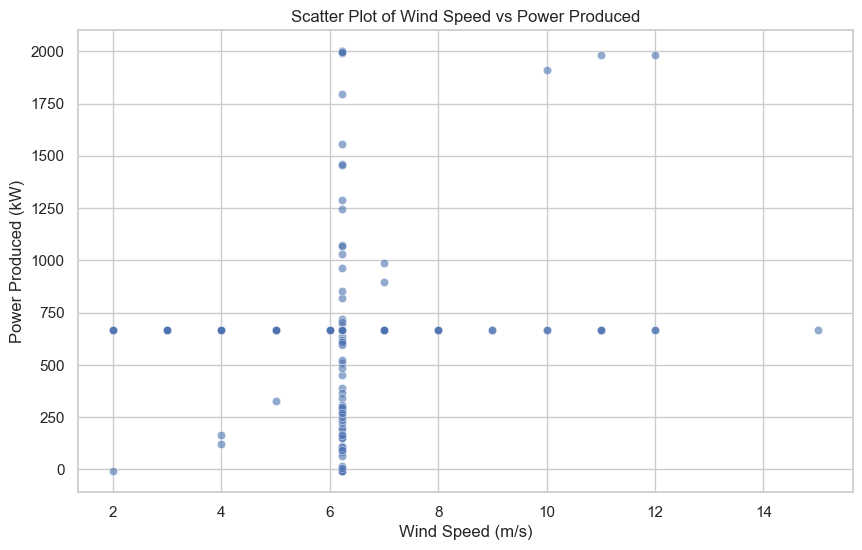

In [39]:
# Scatter plot between Wind Speed and Power Produced
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='PowerProduced', data=df, alpha=0.6)
plt.title('Scatter Plot of Wind Speed vs Power Produced')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Produced (kW)')
plt.grid(True)
plt.show()


### Scatter plot with correct column name for Pitch Angle


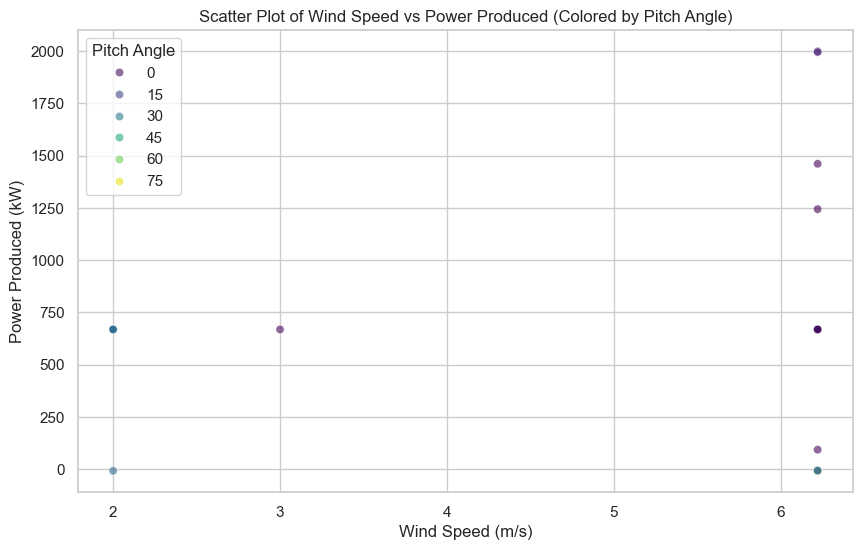

In [43]:
# Scatter plot with correct column name for Pitch Angle
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WindSpeed', y='PowerProduced', hue='PitchAngle', data=df, palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Wind Speed vs Power Produced (Colored by Pitch Angle)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Produced (kW)')
plt.legend(title='Pitch Angle')
plt.grid(True)
plt.show()


## C- Data Analysis

To complete Part C – Data Analysis, let's break it down into separate steps to ensure clarity. We'll tackle the tasks one by one and provide code examples where necessary.

#### Step 1: Calculating and Visualizing Monthly Averages
We'll calculate the average wind speed and power production by month across all four years.

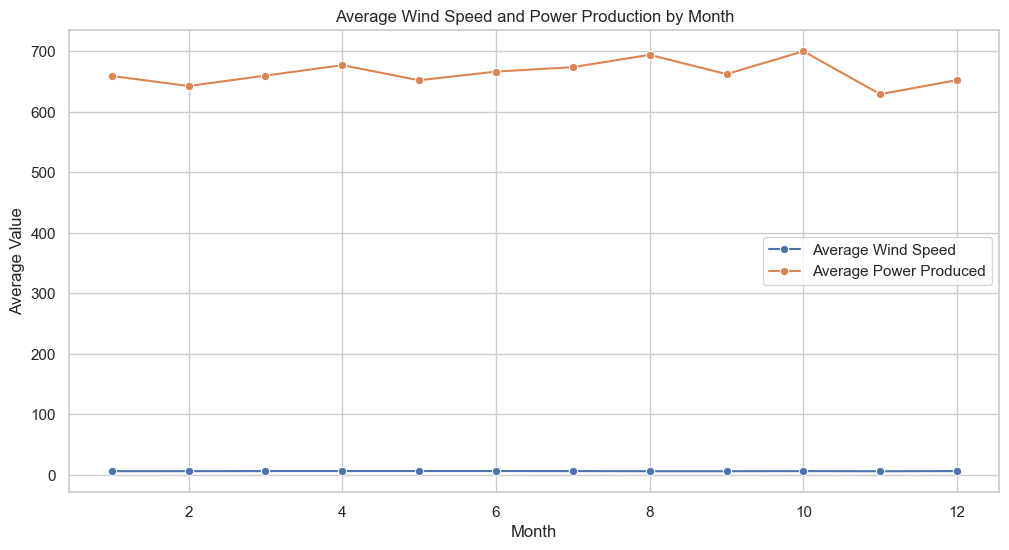

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month and year from the Timestamp
df['Month'] = df['PCTimeStamp'].dt.month
df['Year'] = df['PCTimeStamp'].dt.year

# Group by month and calculate averages
monthly_avg = df.groupby('Month').agg({'WindSpeed': 'mean', 'PowerProduced': 'mean'}).reset_index()

# Plotting the averages by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='WindSpeed', data=monthly_avg, marker='o', label='Average Wind Speed')
sns.lineplot(x='Month', y='PowerProduced', data=monthly_avg, marker='o', label='Average Power Produced')
plt.title('Average Wind Speed and Power Production by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


### Step 2: Calculating and Visualizing Hourly Averages
Next, we'll analyze how wind speed and power production vary by hour of the day

C:\Users\PC\AppData\Local\Temp\ipykernel_13704\3599949420.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hourly_avg['WindSpeed'].fillna(hourly_avg['WindSpeed'].mean(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13704\3599949420.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

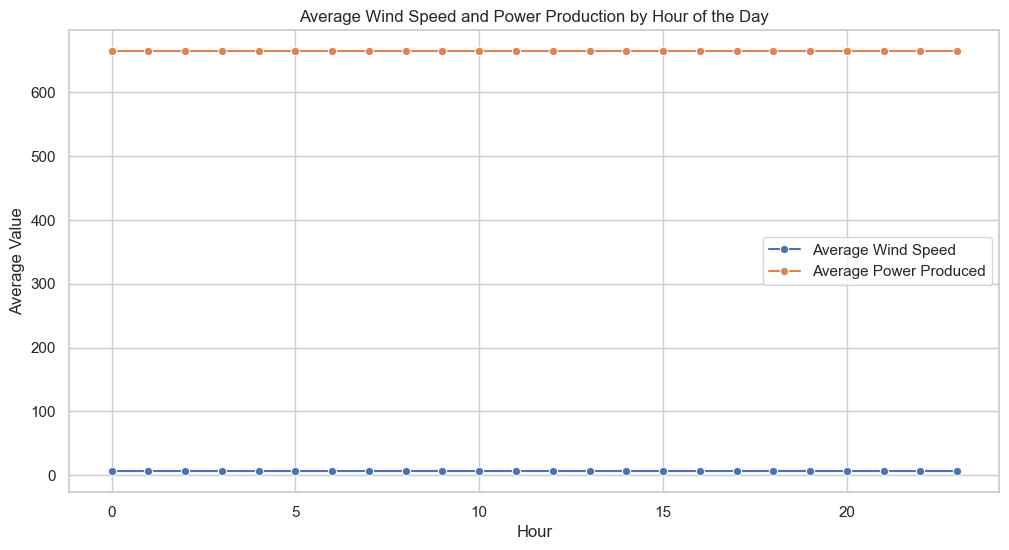

In [35]:
# Extract the hour from the Timestamp
df['Hour'] = df['PCTimeStamp'].dt.hour
# Group by hour and calculate averages
hourly_avg = df.groupby('Hour').agg({'WindSpeed': 'mean', 'PowerProduced': 'mean'}).reset_index()
# Ensure all hours (0-23) are present, even if there's no data for some hours
all_hours = pd.DataFrame({'Hour': range(24)})
hourly_avg = pd.merge(all_hours, hourly_avg, on='Hour', how='left')
hourly_avg['WindSpeed'].fillna(hourly_avg['WindSpeed'].mean(), inplace=True)
hourly_avg['PowerProduced'].fillna(hourly_avg['PowerProduced'].mean(), inplace=True)

# Plotting the averages by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='WindSpeed', data=hourly_avg, marker='o', label='Average Wind Speed')
sns.lineplot(x='Hour', y='PowerProduced', data=hourly_avg, marker='o', label='Average Power Produced')

# Setting the plot title and labels
plt.title('Average Wind Speed and Power Production by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Step 3: Finding the Ten Days with the Highest Wind Speeds in 2022
We'll identify the top 10 days in 2022 with the highest average wind speed.

In [36]:

# Filter data for 2022 only
df_2022 = df[df['Year'] == 2022]
df_2022['WindSpeed'] = pd.to_numeric(df_2022['WindSpeed'], errors='coerce')
df_2022 = df_2022.dropna(subset=['WindSpeed'])

# Group by date and calculate average wind speed
df_2022['Date'] = df_2022['PCTimeStamp'].dt.date
daily_avg_2022 = df_2022.groupby('Date')['WindSpeed'].mean().reset_index()

# Sort to get top 10 days with the highest wind speed
top_10_wind_days = daily_avg_2022.nlargest(10, 'WindSpeed')
print("Top 10 Days with Highest Average Wind Speed in 2022:")
print(top_10_wind_days)


Top 10 Days with Highest Average Wind Speed in 2022:
           Date  WindSpeed
49   2022-05-02   8.000000
77   2022-07-06   7.000000
80   2022-07-09   7.000000
121  2022-11-02   7.000000
0    2022-01-01   6.220293
2    2022-01-03   6.220293
3    2022-01-04   6.220293
4    2022-01-05   6.220293
5    2022-01-06   6.220293
6    2022-01-07   6.220293


C:\Users\PC\AppData\Local\Temp\ipykernel_13704\278732024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['WindSpeed'] = pd.to_numeric(df_2022['WindSpeed'], errors='coerce')


### Step 4: Deriving an Analytical Expression for Maximum Power by Wind Speed
We'll fit a curve to determine the maximum power achievable at a given wind speed.

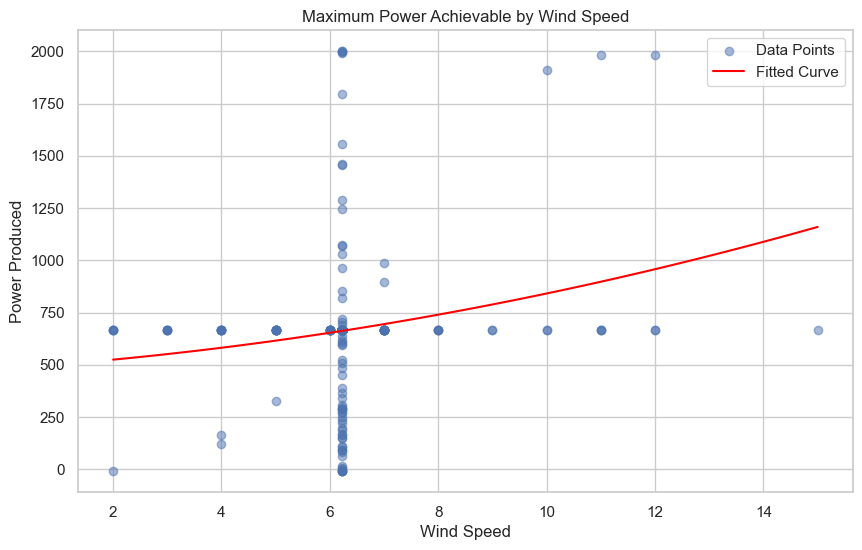

Fitted curve equation: Power = 1.8536*WindSpeed^2 + 17.3116*WindSpeed + 482.8715


In [37]:
import numpy as np
from scipy.optimize import curve_fit

# Define a function for curve fitting (e.g., quadratic relationship)
def power_wind_curve(wind_speed, a, b, c):
    return a * wind_speed**2 + b * wind_speed + c

# Fit the curve to the data
params, _ = curve_fit(power_wind_curve, df['WindSpeed'], df['PowerProduced'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['WindSpeed'], df['PowerProduced'], alpha=0.5, label='Data Points')
x_vals = np.linspace(df['WindSpeed'].min(), df['WindSpeed'].max(), 100)
plt.plot(x_vals, power_wind_curve(x_vals, *params), color='red', label='Fitted Curve')
plt.title('Maximum Power Achievable by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Power Produced')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted curve equation: Power = {params[0]:.4f}*WindSpeed^2 + {params[1]:.4f}*WindSpeed + {params[2]:.4f}")


### Step 5:
Deriving an Analytical Expression for Maximum Power by Blade Pitch Angle
We'll follow a similar process to analyze the relationship between power and pitch angle.

C:\Users\PC\AppData\Local\Temp\ipykernel_13704\1821277249.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params_pitch, _ = curve_fit(power_pitch_curve, df['PitchAngle'], df['PowerProduced'])


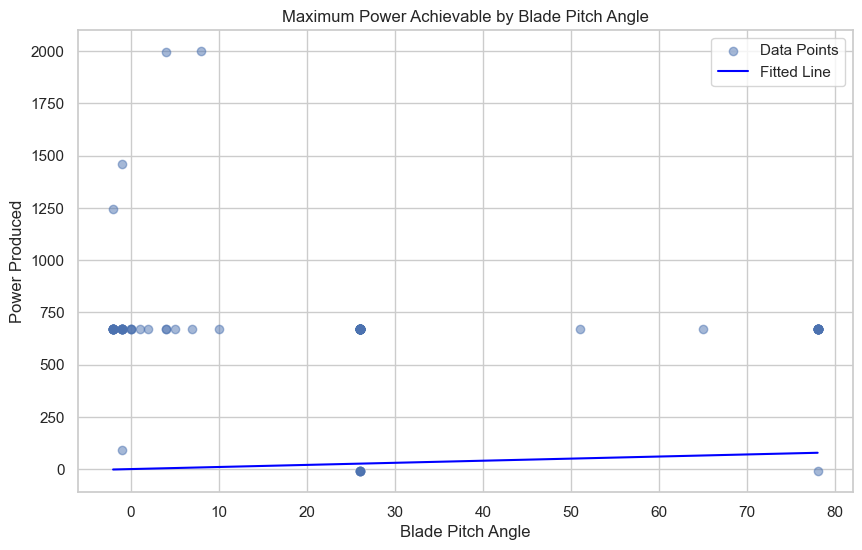

Fitted curve equation: Power = 1.0000*PitchAngle + 1.0000


In [38]:
# Define a function for curve fitting (e.g., linear relationship)
def power_pitch_curve(pitch_angle, a, b):
    return a * pitch_angle + b

# Fit the curve to the data
params_pitch, _ = curve_fit(power_pitch_curve, df['PitchAngle'], df['PowerProduced'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['PitchAngle'], df['PowerProduced'], alpha=0.5, label='Data Points')
x_vals_pitch = np.linspace(df['PitchAngle'].min(), df['PitchAngle'].max(), 100)
plt.plot(x_vals_pitch, power_pitch_curve(x_vals_pitch, *params_pitch), color='blue', label='Fitted Line')
plt.title('Maximum Power Achievable by Blade Pitch Angle')
plt.xlabel('Blade Pitch Angle')
plt.ylabel('Power Produced')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted curve equation: Power = {params_pitch[0]:.4f}*PitchAngle + {params_pitch[1]:.4f}")
